# RQ3 - performance validation for both Multi-Meta-Model

We establish the main non-functional requirement of generating the Multi-Model in less than the simulation time. Similar for the Meta-Model.

We want to show that we meet this requirement, for each of the plot types (time_series, cumulative, and cumulative_time_series.

This is linked with §Performance Validation (§5.3).

### Experiment details
- Experiment 2
- SURF-SARA
- workload over 1 week, 5 minute sampling rate
- 20,160 simulation entries in the dataset
- numbers are in seconds

In [1]:
import math, statistics
import matplotlib.pyplot as plt


# 1. Plot for Multi-Model

In [2]:
# Data calculations
simulation_time = 58.0
time_series_average_multi = round(statistics.mean([9.8, 5.9, 5.5, 6.0]), 1)
cumulative_average_multi = round(statistics.mean([4.5, 4.7, 4.1, 4.6]), 1)
cumulative_time_series_average_multi = round(statistics.mean([7.5, 5.6, 5.7, 5.9]), 1)

In [3]:
# Total times for each processing type
simulation_time_with_time_series_multi = simulation_time + time_series_average_multi
simulation_time_with_cumulative_multi = simulation_time + cumulative_average_multi
simulation_time_with_cumulative_time_series_multi = simulation_time + cumulative_time_series_average_multi

In [4]:
# Data for plotting
categories = ['Time Series', 'Cumulative', 'Cumulative \nTime Series']
base_time = [simulation_time, simulation_time, simulation_time]
additional_time_multi = [time_series_average_multi, cumulative_average_multi, cumulative_time_series_average_multi]
max_allowed_time_start = [simulation_time_with_time_series_multi, simulation_time_with_cumulative_multi, simulation_time_with_cumulative_time_series_multi]
max_allowed_time = [simulation_time * 2 - t for t in max_allowed_time_start]


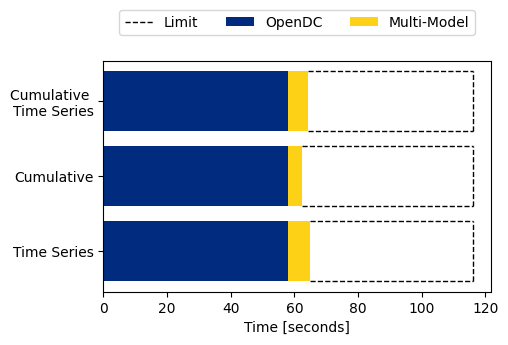

In [5]:
# Plot me!

# Create the horizontal bar plot with improved visual features
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

# Base simulation time bars
ax.barh(categories, base_time, color='#002B7F', label='OpenDC')

# Additional processing time bars
ax.barh(categories, additional_time_multi, left=base_time, color='#FCD116', label='Multi-Model')

# Custom patches for max allowed time with dashed fill
first_patch = True
for i, (cat, start, length) in enumerate(zip(categories, max_allowed_time_start, max_allowed_time)):
    # Create a custom rectangle excluding the left edge
    if first_patch:
        ax.plot([start, start+length], [i-0.4, i-0.4], color='black', linestyle='--', linewidth=1, label="Limit")  # Top edge
        first_patch = False
    else:
        ax.plot([start, start+length], [i-0.4, i-0.4], color='black', linestyle='--', linewidth=1)  # Top edge
    ax.plot([start+length, start+length], [i-0.4, i+0.4], color='black', linestyle='--', linewidth=1)  # Right edge
    ax.plot([start, start+length], [i+0.4, i+0.4], color='black', linestyle='--', linewidth=1)  # Bottom edge
    hatch_rect = plt.Rectangle((start, i-0.4), length, 0.8, edgecolor='none', facecolor='none')
    ax.add_patch(hatch_rect)

# Adding labels and title
ax.set_xlabel('Time [seconds]')


# Move the legend above the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)

# save the plot
plt.savefig("performance_validation_multimodel.pdf", bbox_inches='tight')

# Show the plot
plt.show()

# 2. Plot for Meta-Model
(basically same thing as above, but with different data)

In [6]:
# Data calculations
simulation_time = 58.0
time_series_average_meta = round(statistics.mean([15.7, 11.4, 12.0, 12.4, 10.1, 10.9, 11.1, 10.0]), 1)
cumulative_average_meta = round(statistics.mean([12.2, 12.5, 12.4, 13.0, 9.9, 9.4, 9.9, 9.4]), 1)
cumulative_time_series_average_meta = round(statistics.mean([9.9, 9.5, 9.7, 8.8, 9.7, 9.5, 9.5, 9.5]), 1)

In [7]:
# Total times for each processing type
simulation_time_with_time_series_meta = simulation_time + time_series_average_meta
simulation_time_with_cumulative_meta = simulation_time + cumulative_average_meta
simulation_time_with_cumulative_time_series_meta = simulation_time + cumulative_time_series_average_meta

In [8]:
# Data for plotting
categories = ['Time Series', 'Cumulative', 'Cumulative \nTime Series']
base_time = [simulation_time, simulation_time, simulation_time]
additional_time_meta = [time_series_average_meta, cumulative_average_meta, cumulative_time_series_average_meta]
max_allowed_time_start = [simulation_time_with_time_series_meta, simulation_time_with_cumulative_meta, simulation_time_with_cumulative_time_series_meta]
max_allowed_time = [simulation_time * 2 - t for t in max_allowed_time_start]

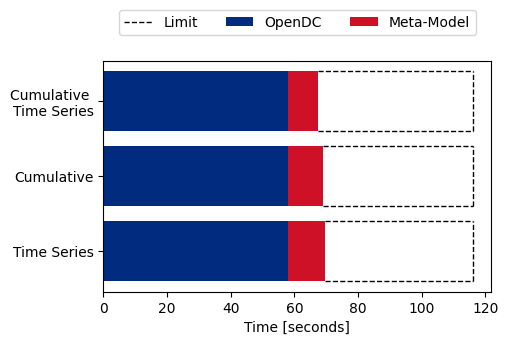

In [9]:
# Plot me!

# Create the horizontal bar plot with improved visual features
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

# Base simulation time bars
ax.barh(categories, base_time, color='#002B7F', label='OpenDC')

# Additional processing time bars
ax.barh(categories, additional_time_meta, left=base_time, color='#CE1126', label='Meta-Model')

# Custom patches for max allowed time with dashed fill
first_patch = True
for i, (cat, start, length) in enumerate(zip(categories, max_allowed_time_start, max_allowed_time)):
    # Create a custom rectangle excluding the left edge
    if first_patch:
        ax.plot([start, start+length], [i-0.4, i-0.4], color='black', linestyle='--', linewidth=1, label="Limit")  # Top edge
        first_patch = False
    else:
        ax.plot([start, start+length], [i-0.4, i-0.4], color='black', linestyle='--', linewidth=1)  # Top edge
    ax.plot([start+length, start+length], [i-0.4, i+0.4], color='black', linestyle='--', linewidth=1)  # Right edge
    ax.plot([start, start+length], [i+0.4, i+0.4], color='black', linestyle='--', linewidth=1)  # Bottom edge
    hatch_rect = plt.Rectangle((start, i-0.4), length, 0.8, edgecolor='none', facecolor='none')
    ax.add_patch(hatch_rect)
    
# Adding labels
ax.set_xlabel('Time [seconds]')

# Move the legend above the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3)

# save the plot
plt.savefig("performance_validation_metamodel.pdf", bbox_inches='tight')

# Show the plot
plt.show()


# 3. Plot for both Multi-Meta-Model

In [12]:
simulation_time = 58.0
additional_time_multi = [time_series_average_multi, cumulative_average_multi, cumulative_time_series_average_multi]
additional_time_meta = [(time_series_average_multi + time_series_average_meta), (cumulative_average_multi + cumulative_average_meta), (cumulative_time_series_average_multi + cumulative_time_series_average_meta)]
max_allowed_time_start = [simulation_time + t for t in additional_time_meta]
max_allowed_time = [simulation_time * 3 - t for t in max_allowed_time_start]

len(additional_time_meta)

3

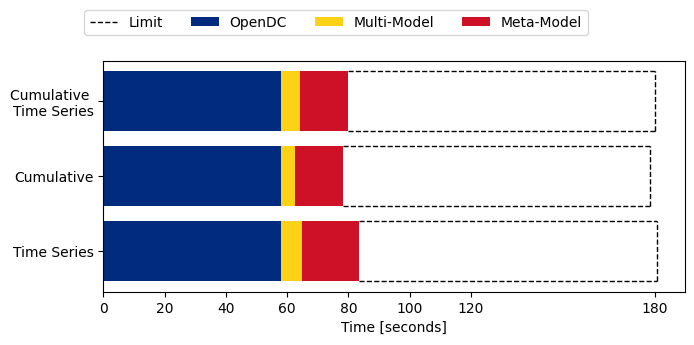

In [17]:
# Plot me!

# Create the horizontal bar plot with improved visual features
fig, ax = plt.subplots()
fig.set_size_inches(7.5, 3)

# Base simulation time bars
ax.barh(categories, base_time, color='#002B7F', label='OpenDC')

# Additional processing time bars multi-model
ax.barh(categories, additional_time_multi, left=base_time, color='#FCD116', label='Multi-Model')

# Additional processing time bars meta-model
left = [(base_time[i] + additional_time_multi[i]) for i in range(len(base_time))]
ax.barh(categories, additional_time_meta, left=left, color='#CE1126', label='Meta-Model')

first_patch = True
for i, (cat, start, length) in enumerate(zip(categories, max_allowed_time_start, max_allowed_time)):
    line_start = left[i] + additional_time_meta[i]  # Start immediately after the yellow bars
    if first_patch:
        ax.plot([line_start, line_start + length], [i - 0.4, i - 0.4], color='black', linestyle='--', linewidth=1, label="Limit")  # Top edge
        first_patch = False
    else:
        ax.plot([line_start, line_start + length], [i - 0.4, i - 0.4], color='black', linestyle='--', linewidth=1)  # Top edge
    ax.plot([line_start + length, line_start + length], [i - 0.4, i + 0.4], color='black', linestyle='--', linewidth=1)  # Right edge
    ax.plot([line_start, line_start + length], [i + 0.4, i + 0.4], color='black', linestyle='--', linewidth=1)  # Bottom edge

# Adding labels
ax.set_xlabel('Time [seconds]')

# set max 4 ticks
ax.set_xticks([0, 20, 40, 60, 80, 100, 120, 180])

# Move the legend above the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.25), ncol=4)

# Save the plot
plt.savefig("performance_validation_both.pdf", bbox_inches='tight')


# Show the plot
plt.show()
